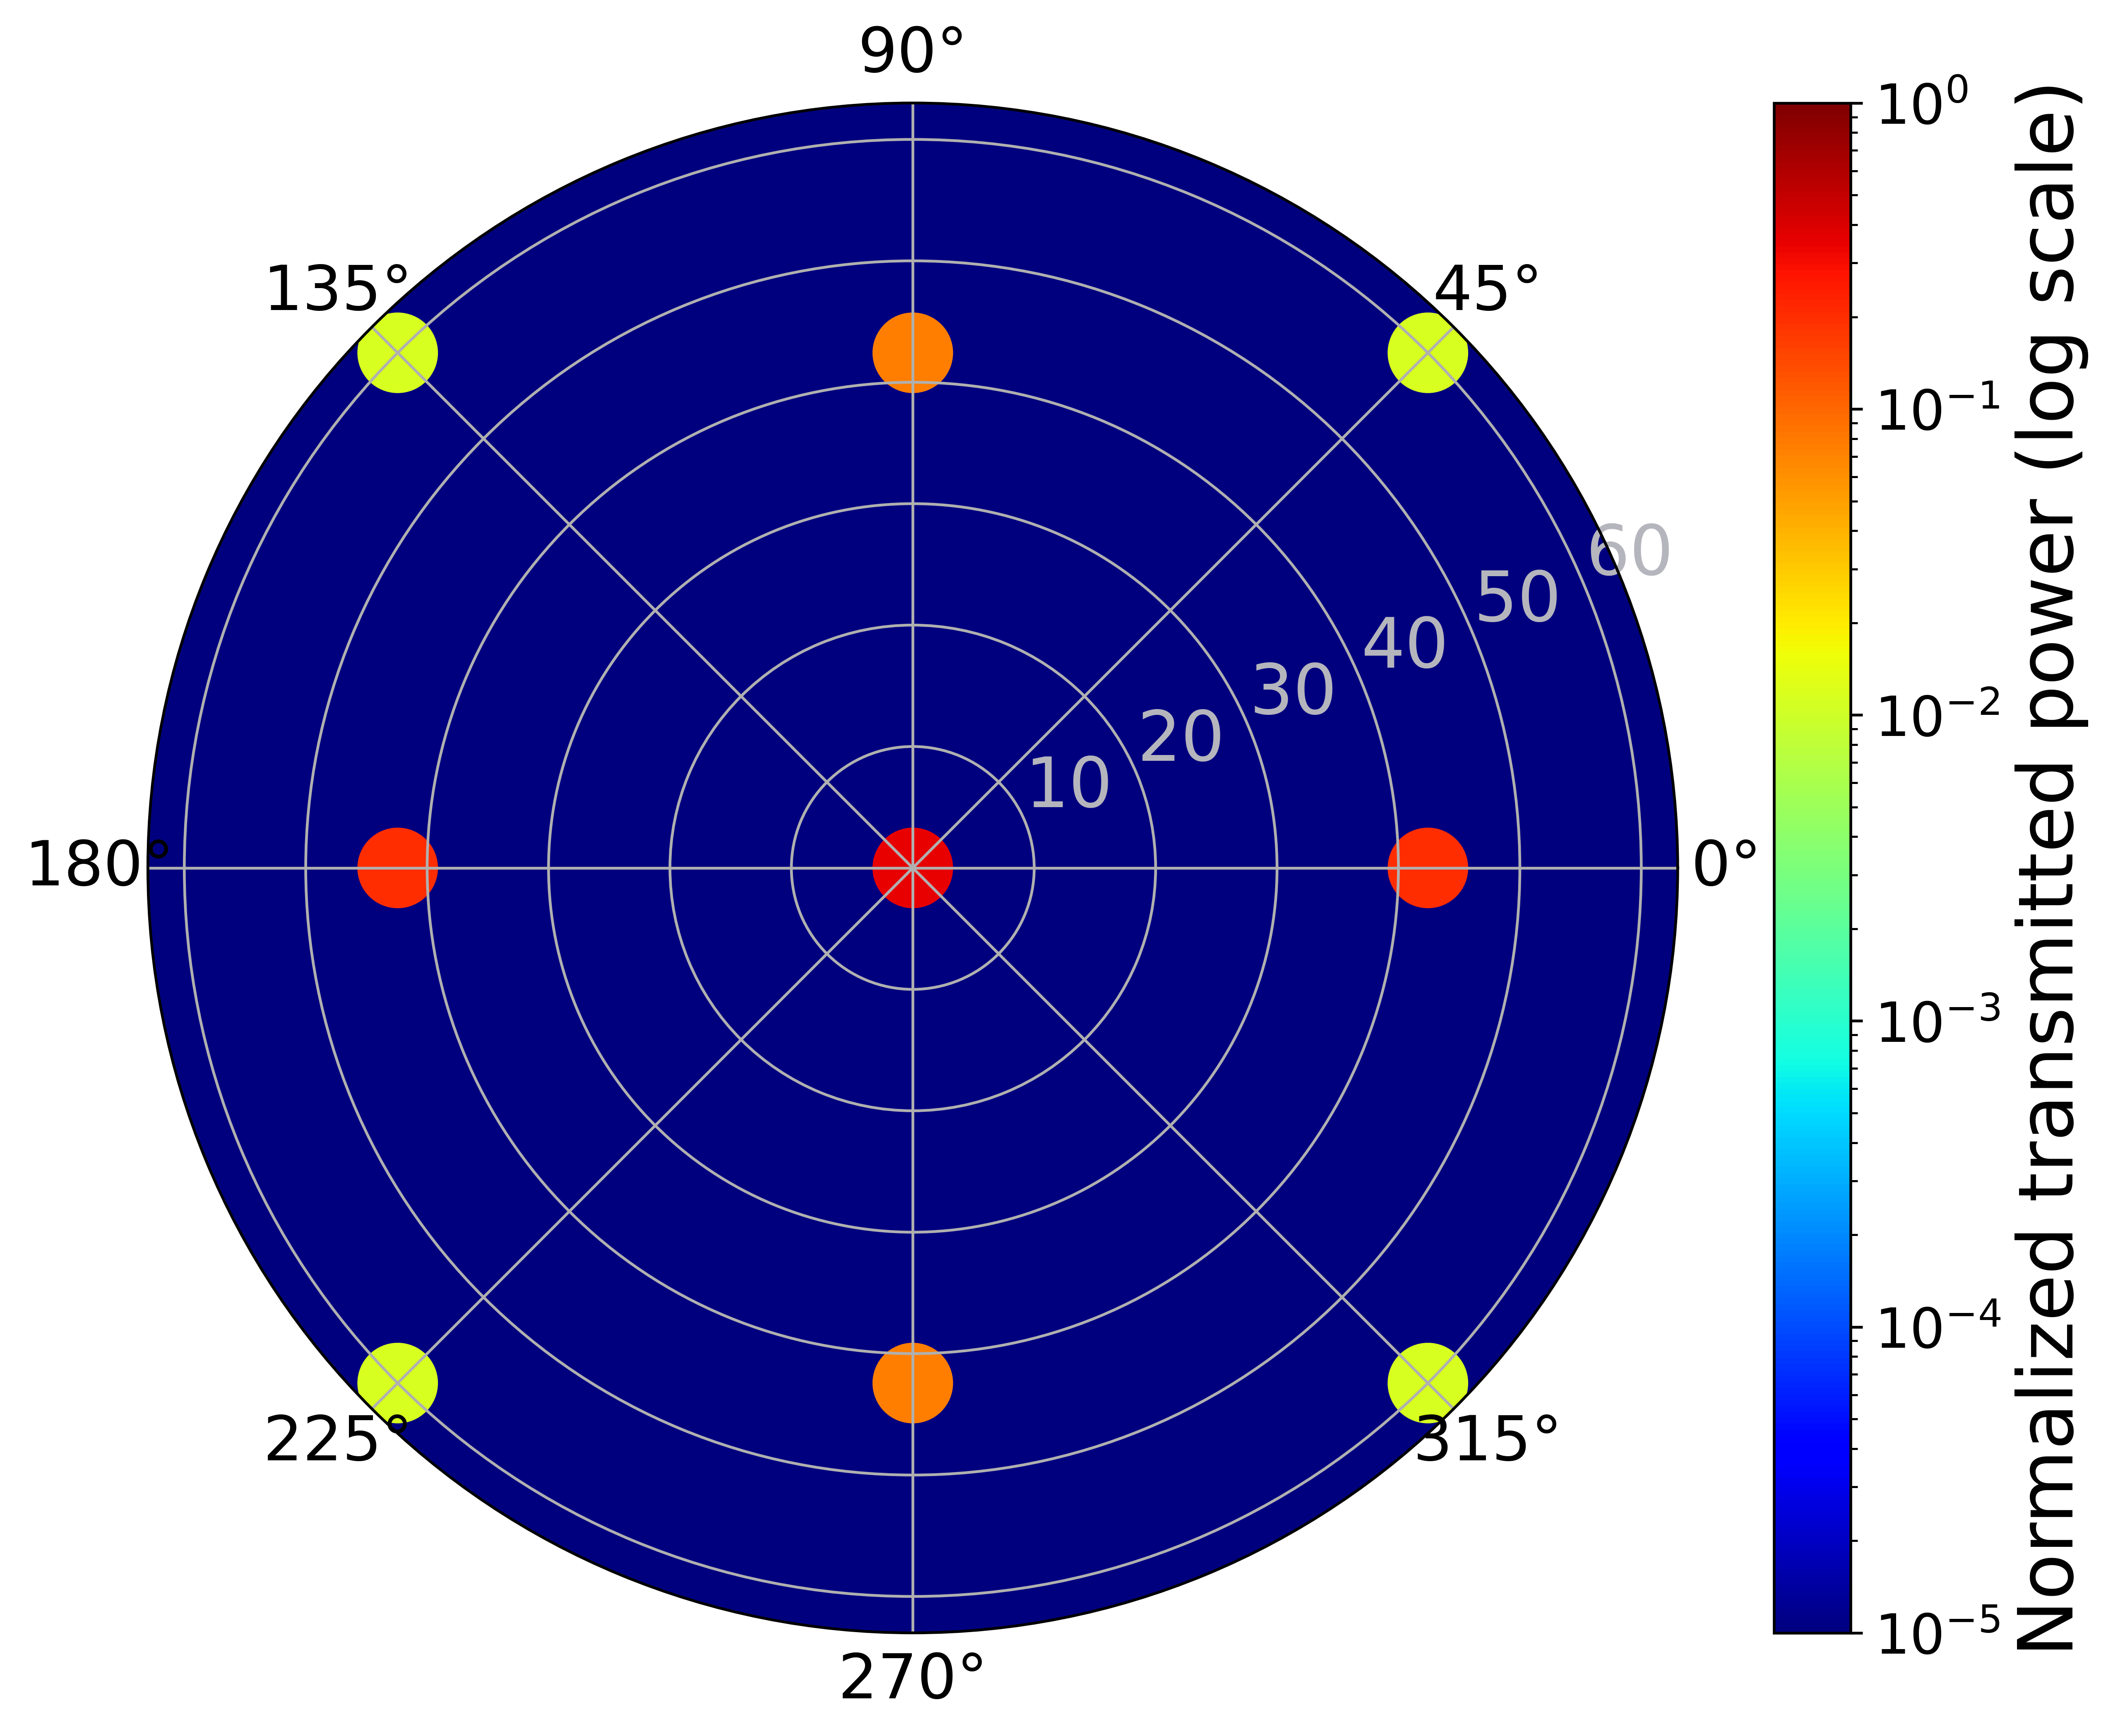

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm  # Import LogNorm
import h5py

# Assuming 'r' is an array of radii and 'theta' is an array of angles in radians
# 'intensity' is an array of the same length representing the data point intensities

x = np.linspace(-12, 12, 25)
y = np.linspace(-12, 12, 25)

# Initialize arrays to store r and theta values
r = np.zeros((25, 25))
theta = np.zeros((25, 25))

for i in range(25):
    for j in range(25):
        r[i, j] = np.sqrt(x[i]**2 + y[j]**2)
        theta[i, j] = np.arctan2(y[j], x[i])

# Flatten the arrays
r_flat = r.flatten()
r_flat = (r_flat/np.max(r_flat))*90
theta_flat = theta.flatten()

# Load MATLAB data file
mat_file = h5py.File('farfield_T&R_orders_1050nm.mat')

values = mat_file['T_nm_new'][:]
values = values.T
# values = values + 1e-18  # Adding a small value to avoid log(0)

intensity = values.flatten()


# Create a mask to exclude elements of intensity that are less than 2
# mask = intensity >= 2
mask = intensity > 1e-18

# Filter the arrays using the mask
intensity = intensity[mask]
r_flat = r_flat[mask]
theta_flat = theta_flat[mask]


# Set DPI and figure size
fig = plt.figure(dpi=600, figsize=(10, 8))

ax = fig.add_subplot(111, polar=True, facecolor='#00007F')  # change background color via "facecolor"
c = ax.scatter(theta_flat, r_flat, c=intensity, s=500, cmap='jet', norm=LogNorm(vmin=1e-5, vmax=1e0))  # change s to change the size of the circular dots

# Set label size and color for the radius and angle
# ax.tick_params(labelsize=18)  # Set label size for both radius and angle
ax.yaxis.set_tick_params(labelsize=20)  # Specifically set label size for radius
ax.xaxis.set_tick_params(labelsize=18)  # Specifically set label size for angle

# Change the color of the radius labels to white
for label in ax.get_yticklabels():
    label.set_color('#b5b5bd')

# Add colorbar
cbar = plt.colorbar(c)

# Set the size of colorbar ticks and label
cbar.ax.tick_params(labelsize=16)  # Change the size of the colorbar ticks
cbar.set_label('Normalized transmitted power (log scale)', size=22)  # Change the size of the colorbar label

plt.savefig('t1050nm.pdf', format='pdf', dpi=600, bbox_inches='tight')

plt.show()


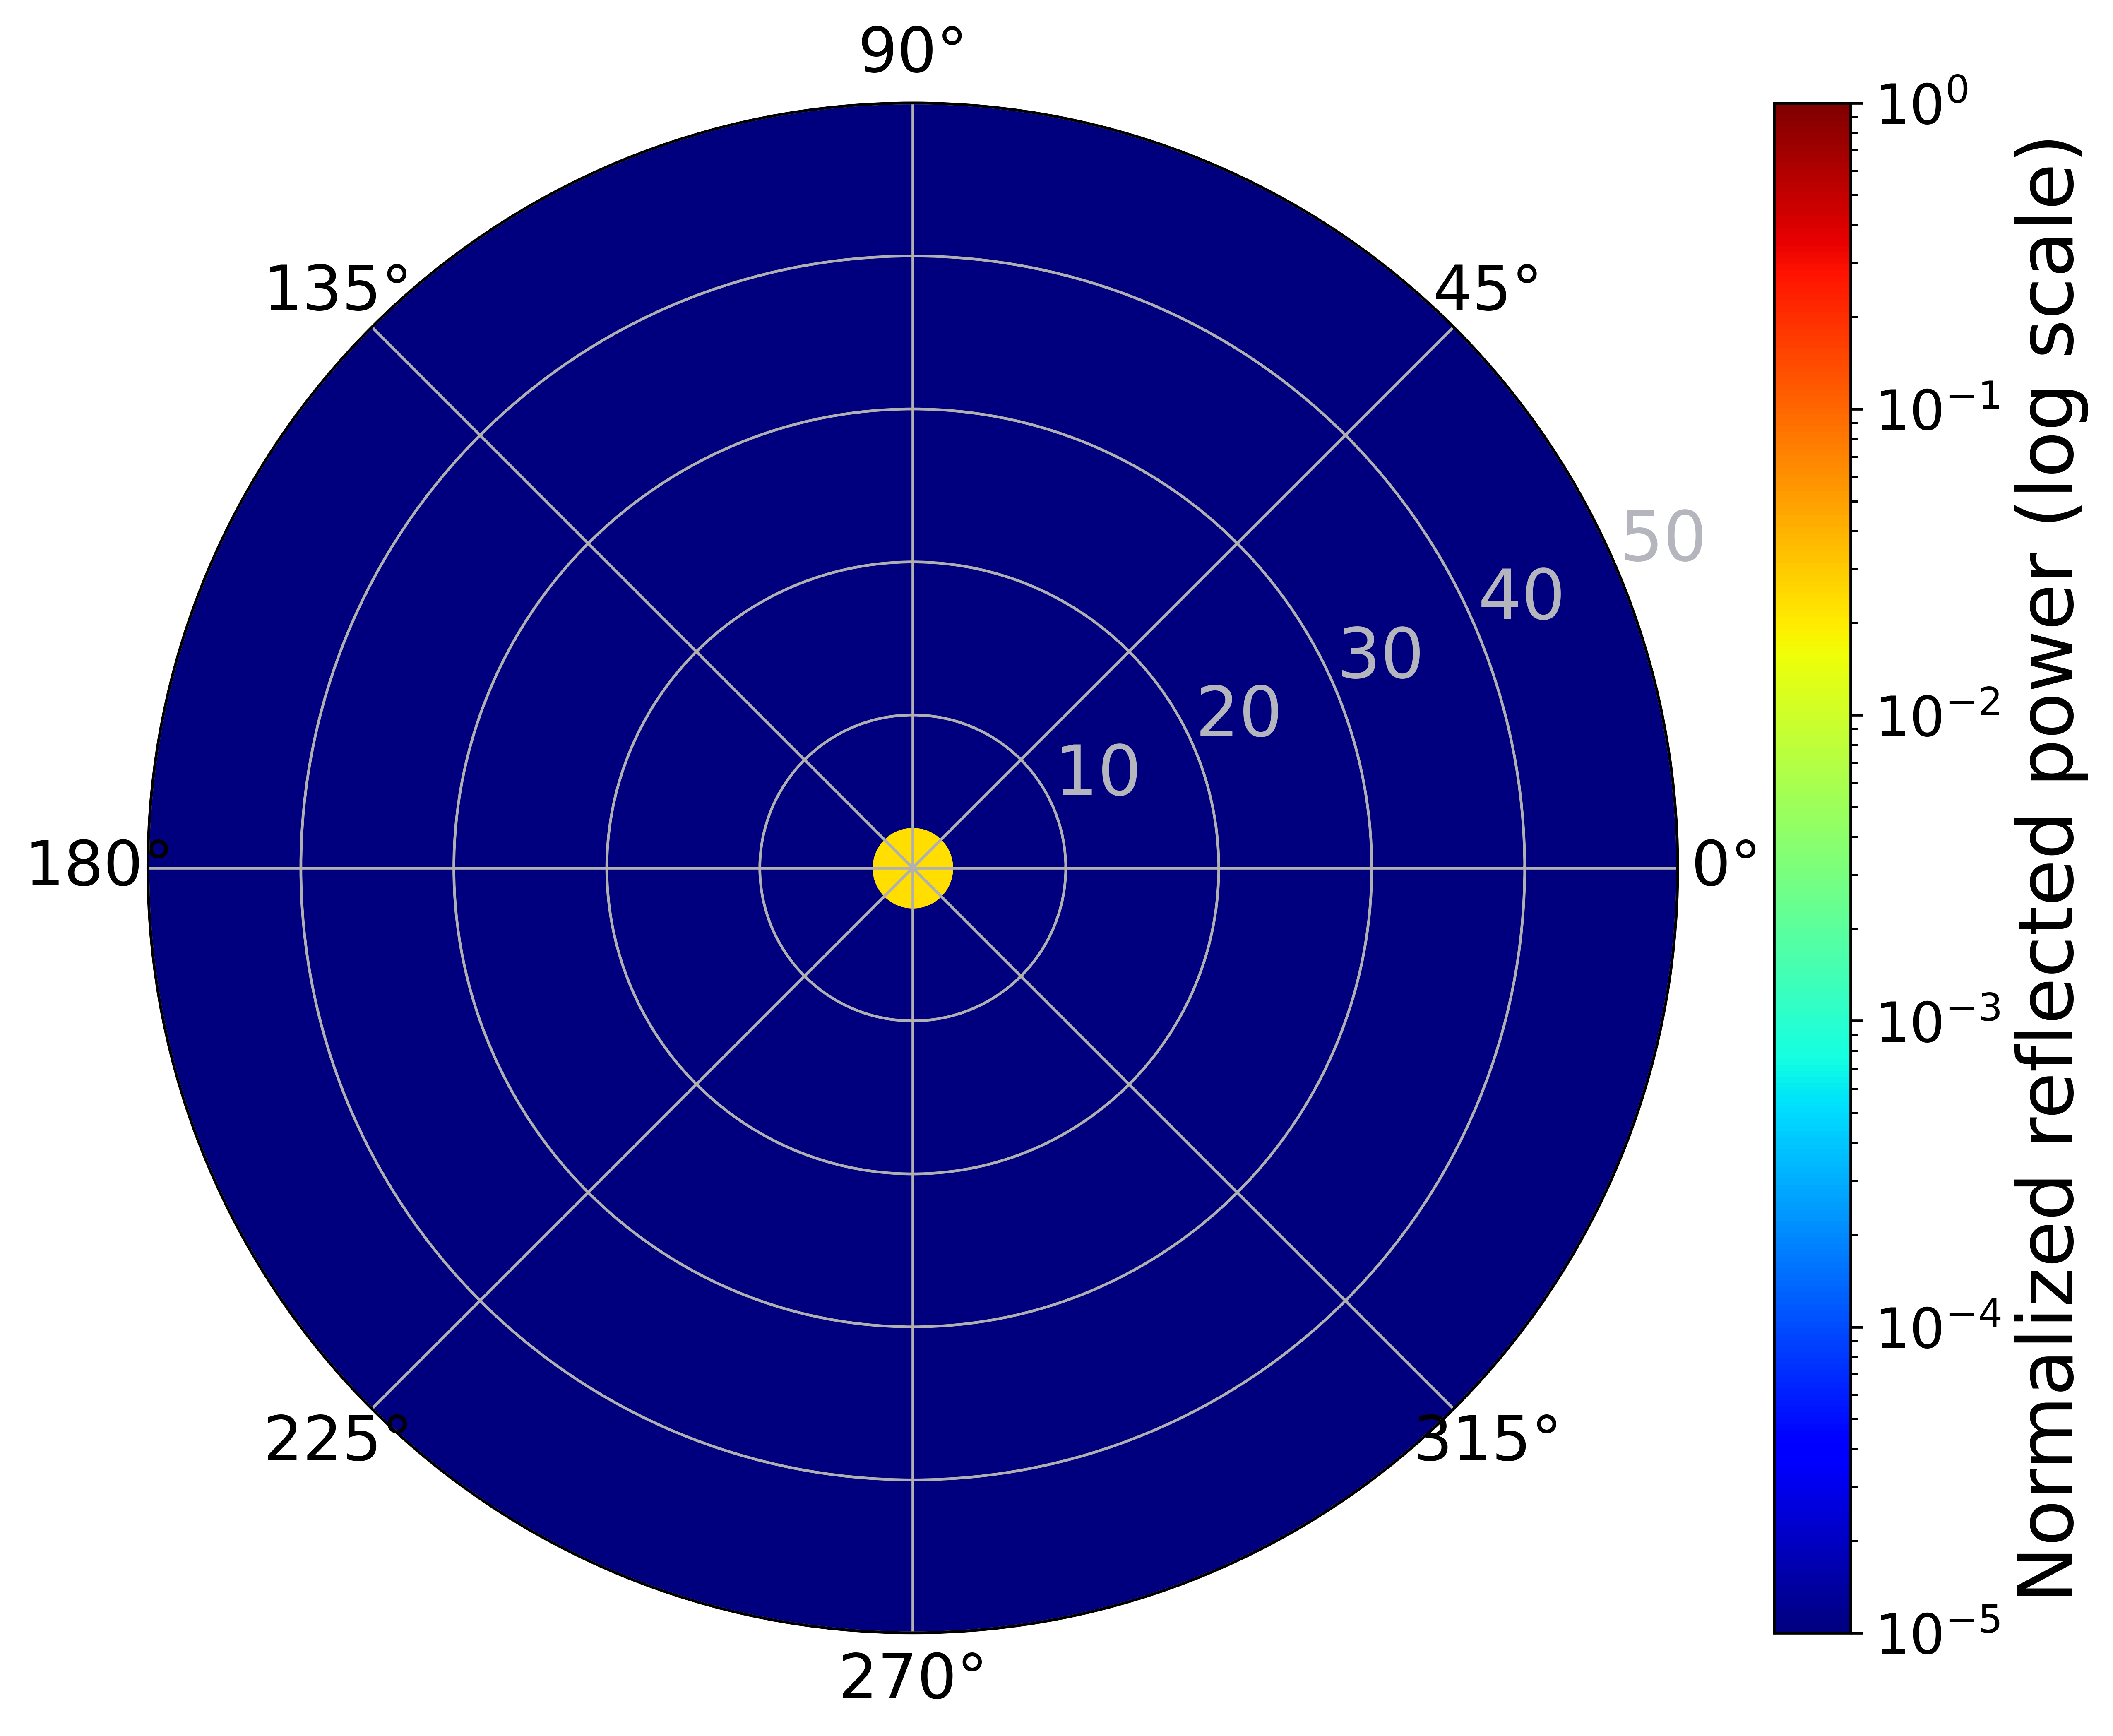

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm  # Import LogNorm
import h5py

# Assuming 'r' is an array of radii and 'theta' is an array of angles in radians
# 'intensity' is an array of the same length representing the data point intensities

x = np.linspace(-12, 12, 25)
y = np.linspace(-12, 12, 25)

# Initialize arrays to store r and theta values
r = np.zeros((25, 25))
theta = np.zeros((25, 25))

for i in range(25):
    for j in range(25):
        r[i, j] = np.sqrt(x[i]**2 + y[j]**2)
        theta[i, j] = np.arctan2(y[j], x[i])

# Flatten the arrays
r_flat = r.flatten()
r_flat = (r_flat/np.max(r_flat))*90
theta_flat = theta.flatten()

# Load MATLAB data file
# mat_file = h5py.File('farfield_T&R_orders_750nm.mat')

values = mat_file['R_nm_new'][:]
values = values.T
# values = values + 1e-18  # Adding a small value to avoid log(0)

intensity = values.flatten()


# Create a mask to exclude elements of intensity that are less than 2
# mask = intensity >= 2
mask = intensity > 1e-18

# Filter the arrays using the mask
intensity = intensity[mask]
r_flat = r_flat[mask]
theta_flat = theta_flat[mask]


# Set DPI and figure size
fig = plt.figure(dpi=600, figsize=(10, 8))

ax = fig.add_subplot(111, polar=True, facecolor='#00007F')  # change background color via "facecolor"
c = ax.scatter(theta_flat, r_flat, c=intensity, s=500, cmap='jet', norm=LogNorm(vmin=1e-5, vmax=1e0))  # change s to change the size of the circular dots

# Set label size and color for the radius and angle
# ax.tick_params(labelsize=18)  # Set label size for both radius and angle
ax.yaxis.set_tick_params(labelsize=20)  # Specifically set label size for radius
ax.xaxis.set_tick_params(labelsize=18)  # Specifically set label size for angle

# Change the color of the radius labels to white
for label in ax.get_yticklabels():
    label.set_color('#b5b5bd')

# Set r-axis limit
ax.set_ylim(0, 50)  # Enable this line when there is only one order at the center

# Add colorbar
cbar = plt.colorbar(c)

# Set the size of colorbar ticks and label
cbar.ax.tick_params(labelsize=16)  # Change the size of the colorbar ticks
cbar.set_label('Normalized reflected power (log scale)', size=22)  # Change the size of the colorbar label

plt.savefig('r1050nm.pdf', format='pdf', dpi=600, bbox_inches='tight')

plt.show()
